# Module 3 : Performance measurements of Logistic regression and Naive Bayes algorithms

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore")    

In [3]:
df=p.read_excel("AirQuality.xlsx")

In [4]:
df.columns

Index(['Country', 'State', 'city', 'place', 'lastupdate', 'Avg', 'Max', 'Min',
       'Pollutants'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Country','State','city','place','lastupdate','Avg','Max','Min','Pollutants']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [6]:
df['AQI'] = df.Avg.map({ '68':'satisfactor', '74':'satisfactor', '71':'satisfactor', '4':'good', '39':'good', '42':'good', '27':'good', '263':'poor', '250':'poor', '249':'poor','258':'poor', '284':'poor', '28':'good', '106':'satisfactor', '44':'good', '62':'satisfactor', '59':'satisfactor', '1':'good', '9':'good', '15':'good', '34':'good','63':'satisfactor', '14':'good', '13':'good', '69':'satisfactor', '37':'good', '2':'good', '5':'good', '66':'satisfactor', '202':'poor', '11':'good', '10':'good','52':'satisfactor', '54':'satisfactor', '246':'poor', '248':'poor', '32':'good', '93':'satisfactor', '226':'poor', '189':'moderate', '124':'moderate', '272':'poor','277':'poor', '278':'poor', '279':'poor', '280':'poor', '87':'satisfactor', '19':'good', '240':'poor', '197':'moderate', '38':'good', '84':'satisfactor','61':'satisfactor', '196':'moderate', '171':'moderate', '23' :'good', '111':'moderate', '43' :'good', '188':'moderate', '203' :'poor' , '16' :'good', '20' :'good','225' :'poor' , '190':'moderate', '26' :'good', '104':'moderate', '25' :'good', '224' :'poor' , '210' :'poor' , '83':'satisfactor', '82':'satisfactor', '233' :'poor' ,'205' :'poor' , '78':'satisfactor', '70':'satisfactor', '211' :'poor' , '179':'moderate', '91':'satisfactor', '49':'good', '134':'moderate', '161':'moderate', '223' :'poor' ,'57':'satisfactor', '73':'satisfactor', '207' :'poor' , '184':'moderate', '48' :'good', '6' :'good', '7' :'good', '194':'moderate', '21' :'good', '50' :'good', '231' :'poor' ,'175':'moderate', '45' :'good', '86':'satisfactor', '243' :'poor' , '232' :'poor' , '18' :'good', '31' :'good', '95':'satisfactor', '237' :'poor' , '217' :'poor' ,'99':'satisfactor', '33' :'good', '176':'moderate', '22' :'good', '29' :'good', '107':'moderate', '17' :'good', '75':'satisfactor', '220' :'poor' , '165':'moderate','149':'moderate', '3' :'good', '245' :'poor' , '239' :'poor' , '72':'satisfactor', '77':'satisfactor', '208' :'poor' , '24' :'good', '198':'moderate', '153':'moderate','53':'satisfactor', '228' :'poor' , '186':'moderate', '51':'satisfactor', '247' :'poor' , '219' :'poor' , '100':'satisfactor', '36' :'good', '204' :'poor' , '30' :'good','221' :'poor' , '229' :'poor' , '187':'moderate', '56':'satisfactor', '230' :'poor' , '192':'moderate', '114':'moderate', '274' :'poor' , '236' :'poor' ,'222' :'poor' , '206' :'poor' , '174':'moderate', '58':'satisfactor', '235' :'poor' , '212' :'poor' , '120':'moderate', '148':'moderate', '242' :'poor' ,'215' :'poor' , '80':'satisfactor', '79':'satisfactor', '67':'satisfactor', '40' :'good', '35' :'good', '185':'moderate', '101':'moderate', '46' :'good', '209' :'poor' ,'169':'moderate', '12' :'good', '47' :'good', '227' :'poor' , '200' :'moderate' , '244' :'poor' , '238' :'poor' , '160':'moderate', '282' :'poor' , '218' :'poor' ,'261' :'poor' , '262' :'poor' , '260' :'poor' , '256' :'poor' , '252' :'poor' , '162':'moderate', '172':'moderate', '156':'moderate', '133':'moderate','116':'moderate', '193':'moderate', '123':'moderate', '65':'satisfactor', '96':'satisfactor', '173':'moderate', '103':'moderate', '8' :'good', '273' :'poor' , '275' :'poor' ,'283' :'poor' , '276' :'poor' , '254' :'poor' , '152':'moderate', '105':'moderate', '64':'satisfactor', '0' :'good', '76':'satisfactor', '127':'moderate', '97':'satisfactor','115':'moderate', '150':'moderate', '142':'moderate', '41' :'good', '102':'moderate', '90':'satisfactor', '132':'moderate', '98':'satisfactor', '199':'moderate', '191':'moderate','157':'moderate', '139':'moderate', '94':'satisfactor', '110':'moderate', '270' :'poor' , '268' :'poor' , '281' :'poor' , '265' :'poor' , '267' :'poor' ,'269' :'poor' , '81':'satisfactor', '128':'moderate', '146':'moderate', '145':'moderate', '129':'moderate', '85':'satisfactor', '117':'moderate', '108':'moderate', '154':'moderate','131':'moderate', '255' :'poor' , '257' :'poor' , '88':'satisfactor', '113':'moderate', '118':'moderate', '167':'moderate', '164':'moderate', '137':'moderate','135':'moderate', '138':'moderate', '109':'moderate', '60':'satisfactor', '177':'moderate', '271' :'poor' , '170':'moderate', '144':'moderate', '166':'moderate','155':'moderate', '136':'moderate', '151':'moderate', '89':'satisfactor', '119':'moderate', '266' :'poor' , '264' :'poor' , '251' :'poor' , '253' :'poor' ,'259' :'poor' , '163':'moderate', '159':'moderate', '241' :'poor' , '214' :'poor' , '122':'moderate', '234' :'poor' , '195':'moderate', '130':'moderate','216' :'poor' , '213' :'poor' , '121':'moderate', '112':'moderate', '168':'moderate', '201' :'poor' , '141':'moderate', '181':'moderate', '143':'moderate','126':'moderate', '182':'moderate', '178':'moderate', '158':'moderate', '140':'moderate', '183':'moderate', '92':'satisfactor', '180':'moderate', '147':'moderate', '55':'satisfactor','125':'moderate'})

In [7]:
df['class'] = df.AQI.map({'good':1,'moderate':0, 'servere':0, 'verypoor':0, 'satisfactor':1,'poor':0})

In [8]:
del df['AQI']

In [9]:
df.head()

,Country,State,city,place,lastupdate,Avg,Max,Min,Pollutants,class
0,0,0,4,101,0,68,105,41,5,1
1,0,0,4,101,0,74,99,42,4,1
2,0,0,4,101,0,71,115,45,2,1
3,0,0,4,101,0,4,5,3,1,1
4,0,0,4,101,0,39,106,1,6,1


In [10]:
df.columns

Index(['Country', 'State', 'city', 'place', 'lastupdate', 'Avg', 'Max', 'Min',
       'Pollutants', 'class'],
      dtype='object')

In [11]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [12]:
X = df.drop(labels='class', axis=1)
#Response variable
y = df.loc[:,'class']    

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Logistic Regression :

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logR= LogisticRegression()

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")

print(classification_report(y_test,predictR))

accuracy = cross_val_score(logR, X, y, cv=50)
print('Cross validation test results of accuracy:')
print(accuracy)
print("")
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
print("")

cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")



Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.99      0.99      0.99       175

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248

Cross validation test results of accuracy:
[0.94117647 1.         1.         1.         1.         1.
 1.         0.94117647 1.         1.         1.         1.
 0.94117647 1.         1.         1.         1.         0.94117647
 0.94117647 1.         1.         1.         1.         0.94117647
 0.94117647 0.88235294 0.94117647 1.         1.         0.82352941
 1.         0.94117647 1.         0.9375     0.9375     0.9375
 0.8125     1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.93333333
 1.         1.        ]


Accuracy result of Logistic Regression i

In [15]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 173
True Negative : 71
False Positive : 2
False Negative : 2

True Positive Rate : 0.9885714285714285
True Negative Rate : 0.9726027397260274
False Positive Rate : 0.0273972602739726
False Negative Rate : 0.011428571428571429

Positive Predictive Value : 0.9885714285714285
Negative predictive value : 0.9726027397260274


Naive Bayes:

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train,y_train)

predictR = gnb.predict(X_test)

print("")
print('Classification report of Naive Bayes Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(gnb, X, y, cv=50)
print('Cross validation test results of accuracy:')
print(accuracy)
print("")

#get the mean of each fold 
print("")
print("Accuracy result of Naive Bayes is:",accuracy.mean() * 100)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")





Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       0.99      0.97      0.98       175

    accuracy                           0.98       248
   macro avg       0.96      0.98      0.97       248
weighted avg       0.98      0.98      0.98       248

Cross validation test results of accuracy:
[1.         1.         1.         1.         1.         0.94117647
 1.         1.         1.         1.         0.94117647 1.
 0.94117647 1.         1.         0.94117647 1.         0.94117647
 0.88235294 0.94117647 1.         1.         0.94117647 0.94117647
 1.         0.94117647 0.88235294 0.94117647 0.94117647 0.88235294
 1.         0.94117647 1.         1.         0.9375     1.
 0.875      1.         1.         1.         0.9375     1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


Accuracy result of Naive Bayes is: 97.38235294117646

In [17]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 170
True Negative : 72
False Positive : 1
False Negative : 5

True Positive Rate : 0.9714285714285714
True Negative Rate : 0.9863013698630136
False Positive Rate : 0.0136986301369863
False Negative Rate : 0.02857142857142857

Positive Predictive Value : 0.9941520467836257
Negative predictive value : 0.935064935064935


In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


In [19]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                               X, y, cv=70, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=n.linspace(0.01, 1.0, 50))

In [20]:
train_mean = n.mean(train_scores, axis=1)
train_std = n.std(train_scores, axis=1)

In [21]:
test_mean = n.mean(test_scores, axis=1)
test_std = n.std(test_scores, axis=1)

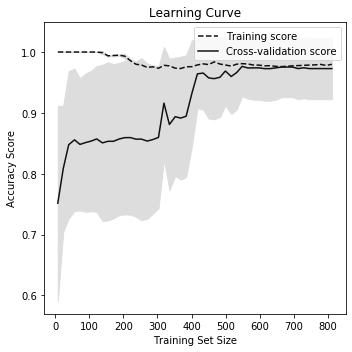

In [22]:
# Logistic regression
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [23]:
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), 
                                               X, y, cv=70, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=n.linspace(0.01, 1.0, 50))

In [24]:
train_mean = n.mean(train_scores, axis=1)
train_std = n.std(train_scores, axis=1)

In [25]:
test_mean = n.mean(test_scores, axis=1)
test_std = n.std(test_scores, axis=1)

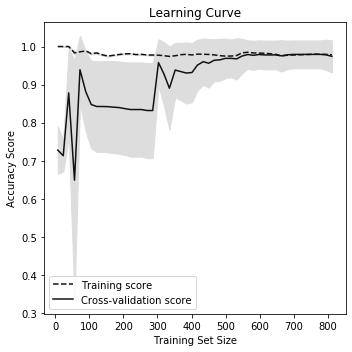

In [26]:
# Naive bayes
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()